In [4]:
pip install pathlib

DEPRECATION: Loading egg at /home/blockchain/anaconda3/lib/python3.11/site-packages/mmfashion-0.4.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /home/blockchain/anaconda3/lib/python3.11/site-packages/torchvision-0.18.0-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import tensorflow as tf
from sklearn.model_selection import train_test_split

2025-02-11 10:47:53.594706: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 10:47:53.715708: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739251073.768297   20051 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739251073.784341   20051 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 10:47:53.904124: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
train_path = Path('/home/blockchain/Downloads/FIsh classification/images.cv_jzk6llhf18tm3k0kyttxz/data/train')
test_path = Path('/home/blockchain/Downloads/FIsh classification/images.cv_jzk6llhf18tm3k0kyttxz/data/test')
val_path = Path('/home/blockchain/Downloads/FIsh classification/images.cv_jzk6llhf18tm3k0kyttxz/data/val')

In [4]:
def create_dataframe(data_path):

    filepaths = list(data_path.glob(r'**/*.jpg'))
    labels = list(map(lambda x:os.path.split(os.path.split(x)[0])[1] , filepaths))

    filepaths = pd.Series(filepaths,name='Filepaths').astype(str)
    labels = pd.Series(labels,name='Lables')

    return pd.concat([filepaths,labels],axis=1)

In [5]:
train_df = create_dataframe(train_path)
test_df = create_dataframe(test_path)
val_df = create_dataframe(val_path)

In [82]:
train_df.head()

,Filepaths,Lables
0,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
1,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
2,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
3,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
4,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass


In [22]:
train_df

,Filepaths,Lables
0,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
1,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
2,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
3,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
4,/home/blockchain/Downloads/FIsh classification...,fish sea_food sea_bass
...,...,...
6220,/home/blockchain/Downloads/FIsh classification...,fish sea_food red_sea_bream
6221,/home/blockchain/Downloads/FIsh classification...,fish sea_food red_sea_bream
6222,/home/blockchain/Downloads/FIsh classification...,fish sea_food red_sea_bream
6223,/home/blockchain/Downloads/FIsh classification...,fish sea_food red_sea_bream


In [40]:
print(train_df['Lables'].nunique())

11


In [41]:
train_df['Lables'].value_counts()

Lables
animal fish                         1096
fish sea_food trout                  580
fish sea_food red_mullet             579
fish sea_food shrimp                 576
fish sea_food hourse_mackerel        573
fish sea_food red_sea_bream          571
fish sea_food black_sea_sprat        569
fish sea_food gilt_head_bream        566
fish sea_food striped_red_mullet     547
fish sea_food sea_bass               538
animal fish bass                      30
Name: count, dtype: int64

In [6]:
samples = []

for category in train_df['Lables'].unique():
    if category == "animal fish bass":
        samples.append(train_df.query("Lables == @category"))
    else:
        category_slice = train_df.query("Lables == @category")
        samples.append(category_slice.sample(200,random_state=1))


train_df =  pd.concat(samples,axis=0).sample(frac=1.0,random_state=1).reset_index(drop=True)


In [84]:
train_df['Lables'].value_counts()

Lables
fish sea_food sea_bass              200
fish sea_food trout                 200
fish sea_food gilt_head_bream       200
fish sea_food red_sea_bream         200
fish sea_food black_sea_sprat       200
animal fish                         200
fish sea_food hourse_mackerel       200
fish sea_food striped_red_mullet    200
fish sea_food red_mullet            200
fish sea_food shrimp                200
animal fish bass                     30
Name: count, dtype: int64

In [7]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,

)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    
)

In [8]:
train_images = train_generator.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'Filepaths',
    y_col = 'Lables',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed =42,
)

val_images = train_generator.flow_from_dataframe(
    dataframe = val_df,
    x_col = 'Filepaths',
    y_col = 'Lables',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed =42,
)

test_images = test_generator.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'Filepaths',
    y_col = 'Lables',
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False
)

Found 2030 validated image filenames belonging to 11 classes.


Found 1092 validated image filenames belonging to 11 classes.
Found 3187 validated image filenames belonging to 11 classes.


In [9]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    input_shape = (224,224,3),
    include_top = False,
    weights="imagenet",
    pooling = "avg",

)

mobilenet_model.trainable = False

2025-02-11 10:51:23.415943: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [ ]:
mobilenet_model.summary()

In [88]:
train_images.labels

[7,
 7,
 10,
 3,
 6,
 7,
 2,
 0,
 6,
 4,
 10,
 9,
 9,
 2,
 4,
 0,
 0,
 2,
 4,
 5,
 0,
 3,
 8,
 6,
 10,
 9,
 8,
 6,
 9,
 2,
 2,
 3,
 6,
 4,
 2,
 5,
 2,
 9,
 10,
 2,
 3,
 0,
 0,
 2,
 0,
 6,
 10,
 5,
 0,
 5,
 10,
 8,
 9,
 5,
 8,
 5,
 7,
 5,
 8,
 2,
 10,
 9,
 3,
 2,
 4,
 10,
 9,
 10,
 7,
 2,
 8,
 0,
 7,
 9,
 9,
 3,
 7,
 8,
 9,
 2,
 8,
 5,
 6,
 4,
 6,
 2,
 2,
 10,
 7,
 8,
 9,
 4,
 8,
 9,
 8,
 6,
 0,
 4,
 5,
 7,
 2,
 10,
 4,
 10,
 3,
 9,
 8,
 6,
 4,
 10,
 7,
 5,
 4,
 0,
 4,
 5,
 3,
 3,
 3,
 7,
 0,
 6,
 0,
 3,
 7,
 3,
 2,
 9,
 5,
 0,
 5,
 7,
 10,
 7,
 0,
 0,
 3,
 8,
 9,
 7,
 9,
 7,
 6,
 2,
 7,
 4,
 8,
 4,
 3,
 10,
 10,
 3,
 10,
 9,
 5,
 3,
 0,
 9,
 9,
 4,
 8,
 10,
 3,
 4,
 5,
 9,
 10,
 5,
 10,
 3,
 9,
 4,
 3,
 0,
 8,
 0,
 2,
 0,
 9,
 7,
 10,
 4,
 8,
 3,
 6,
 0,
 3,
 10,
 6,
 0,
 6,
 0,
 0,
 2,
 4,
 4,
 2,
 7,
 3,
 7,
 4,
 6,
 4,
 9,
 4,
 3,
 0,
 0,
 9,
 7,
 9,
 3,
 10,
 4,
 0,
 4,
 4,
 5,
 3,
 8,
 5,
 1,
 3,
 4,
 6,
 9,
 3,
 6,
 4,
 10,
 3,
 5,
 6,
 4,
 5,
 7,
 7,
 0,
 9,
 5,
 4,
 10,
 6,
 3,

In [10]:
inputs = mobilenet_model.input

x = tf.keras.layers.Dense(128,activation='relu')(mobilenet_model.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)

outputs = tf.keras.layers.Dense(11,activation='softmax')(x)

model = tf.keras.Model(inputs = inputs,outputs = outputs)

model.compile(  
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

history = model.fit(
    train_images,
    validation_data = val_images,
    epochs =10,
)

Epoch 1/10


/home/blockchain/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 320ms/step - accuracy: 0.6432 - loss: 1.1727 - val_accuracy: 0.9670 - val_loss: 0.1282
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - accuracy: 0.9857 - loss: 0.0650 - val_accuracy: 0.9725 - val_loss: 0.0778
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.9961 - loss: 0.0254 - val_accuracy: 0.9835 - val_loss: 0.0514
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 313ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9872 - val_loss: 0.0431
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.9853 - val_loss: 0.0415
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.9899 - val_loss: 0.0357
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 291ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.9881 - val_loss: 0.0357
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 299ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.989

In [11]:
result = model.evaluate(test_images,verbose = 0)
print(result)

[0.023162953555583954, 0.993724524974823]


In [12]:
import tensorflow as tf
import numpy as np
import cv2
from tensorflow.keras.preprocessing import image


def load_and_preprocess_image(img_path, target_size=(224, 224)):  
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array = img_array / 255.0  
    return img_array


img_path = "images.cv_jzk6llhf18tm3k0kyttxz/data/val/fish sea_food red_sea_bream/2KVXTG8MLUAH.jpg"


img_array = load_and_preprocess_image(img_path)


predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Print results
print(f"Predicted Class Index: {predicted_class}")

# If you have class names (labels), map the index to the label
class_names = sorted(train_df['Lables'].unique())  # Replace with actual class labels
print(f"Predicted Class Name: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step
Predicted Class Index: 6
Predicted Class Name: fish sea_food red_sea_bream


In [102]:
model.save("fish_classification_model.keras")


In [ ]:
y_true = test_images.classes 


In [21]:
print(y_true)

[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 10, 10, 10, 10, 10

In [22]:
import numpy as np

# Predict on test data
y_pred_probs = model.predict(test_images)  # Get softmax probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 191ms/step


Accuracy: 0.9937
Precision: 0.9938
Recall: 0.9937
F1 Score: 0.9937


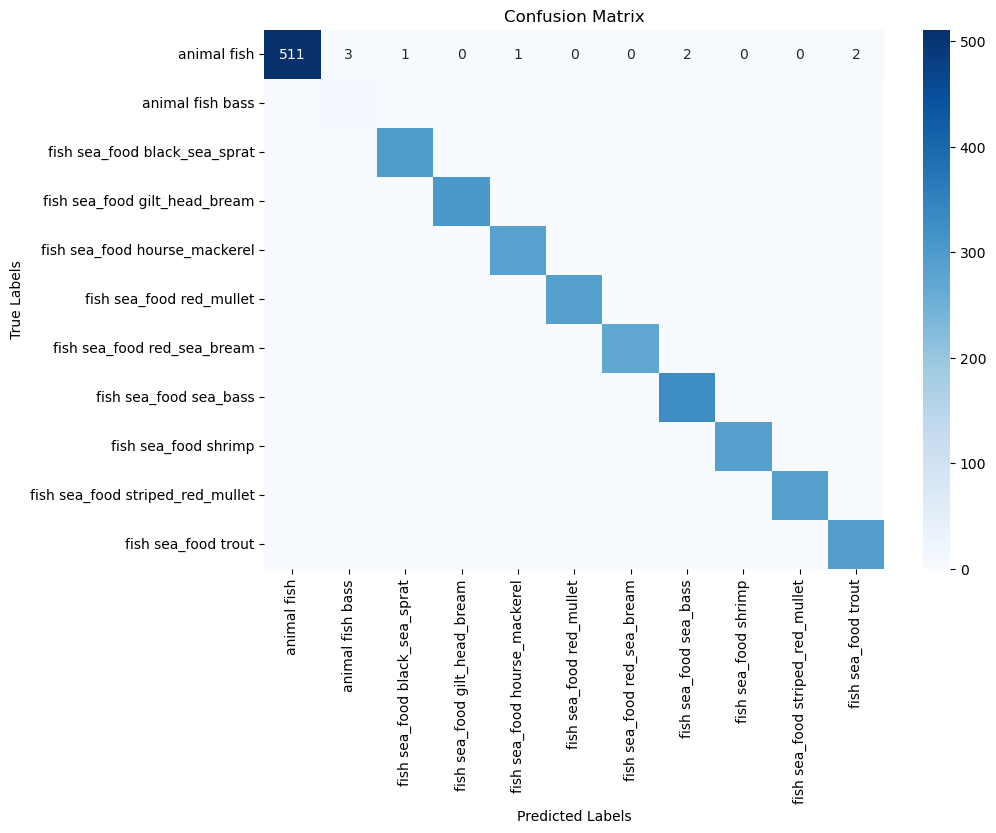

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_images.class_indices.keys(),  # Label names
            yticklabels=test_images.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


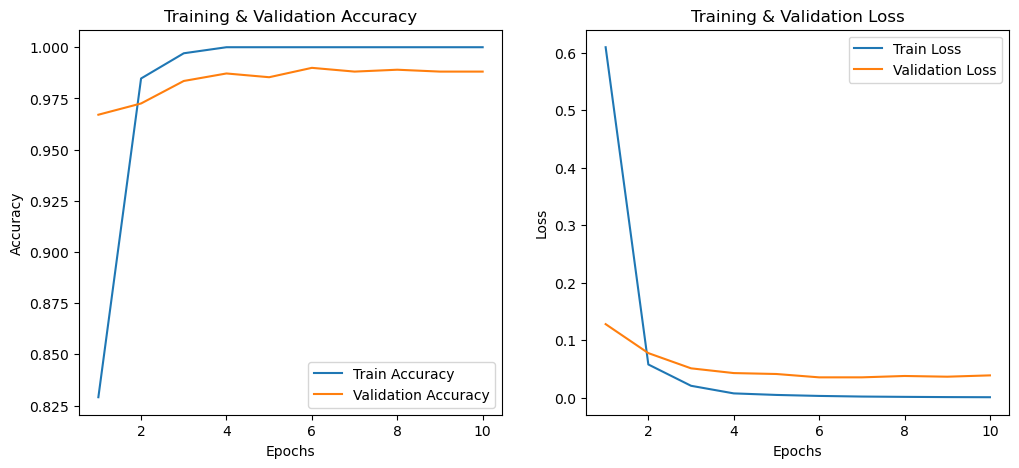

In [24]:
# Extract training history
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['accuracy'], label="Train Accuracy")
plt.plot(epochs, history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['loss'], label="Train Loss")
plt.plot(epochs, history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.show()
